In [47]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [38]:
ticker = ['ZN=F']
data = yf.download(ticker, period = 'max')

[*********************100%%**********************]  1 of 1 completed


In [39]:
change = data['Close'].diff()
change.dropna(inplace=True)

In [40]:
change_up = change.copy()
change_down = change.copy()

change_up[change_up<0] = 0
change_down[change_down>0] = 0

change.equals(change_up+change_down)

avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

In [41]:
rsi = 100 * avg_up / (avg_up + avg_down)

rsi.head(20)

Date
2000-09-22          NaN
2000-09-25          NaN
2000-09-26          NaN
2000-09-27          NaN
2000-09-28          NaN
2000-09-29          NaN
2000-10-02          NaN
2000-10-03          NaN
2000-10-04          NaN
2000-10-05          NaN
2000-10-06          NaN
2000-10-09          NaN
2000-10-10          NaN
2000-10-11    63.946297
2000-10-12    72.891247
2000-10-13    68.676442
2000-10-16    63.638036
2000-10-17    70.455680
2000-10-18    69.592023
2000-10-19    70.787096
Name: Close, dtype: float64

In [42]:
plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = (20, 20)

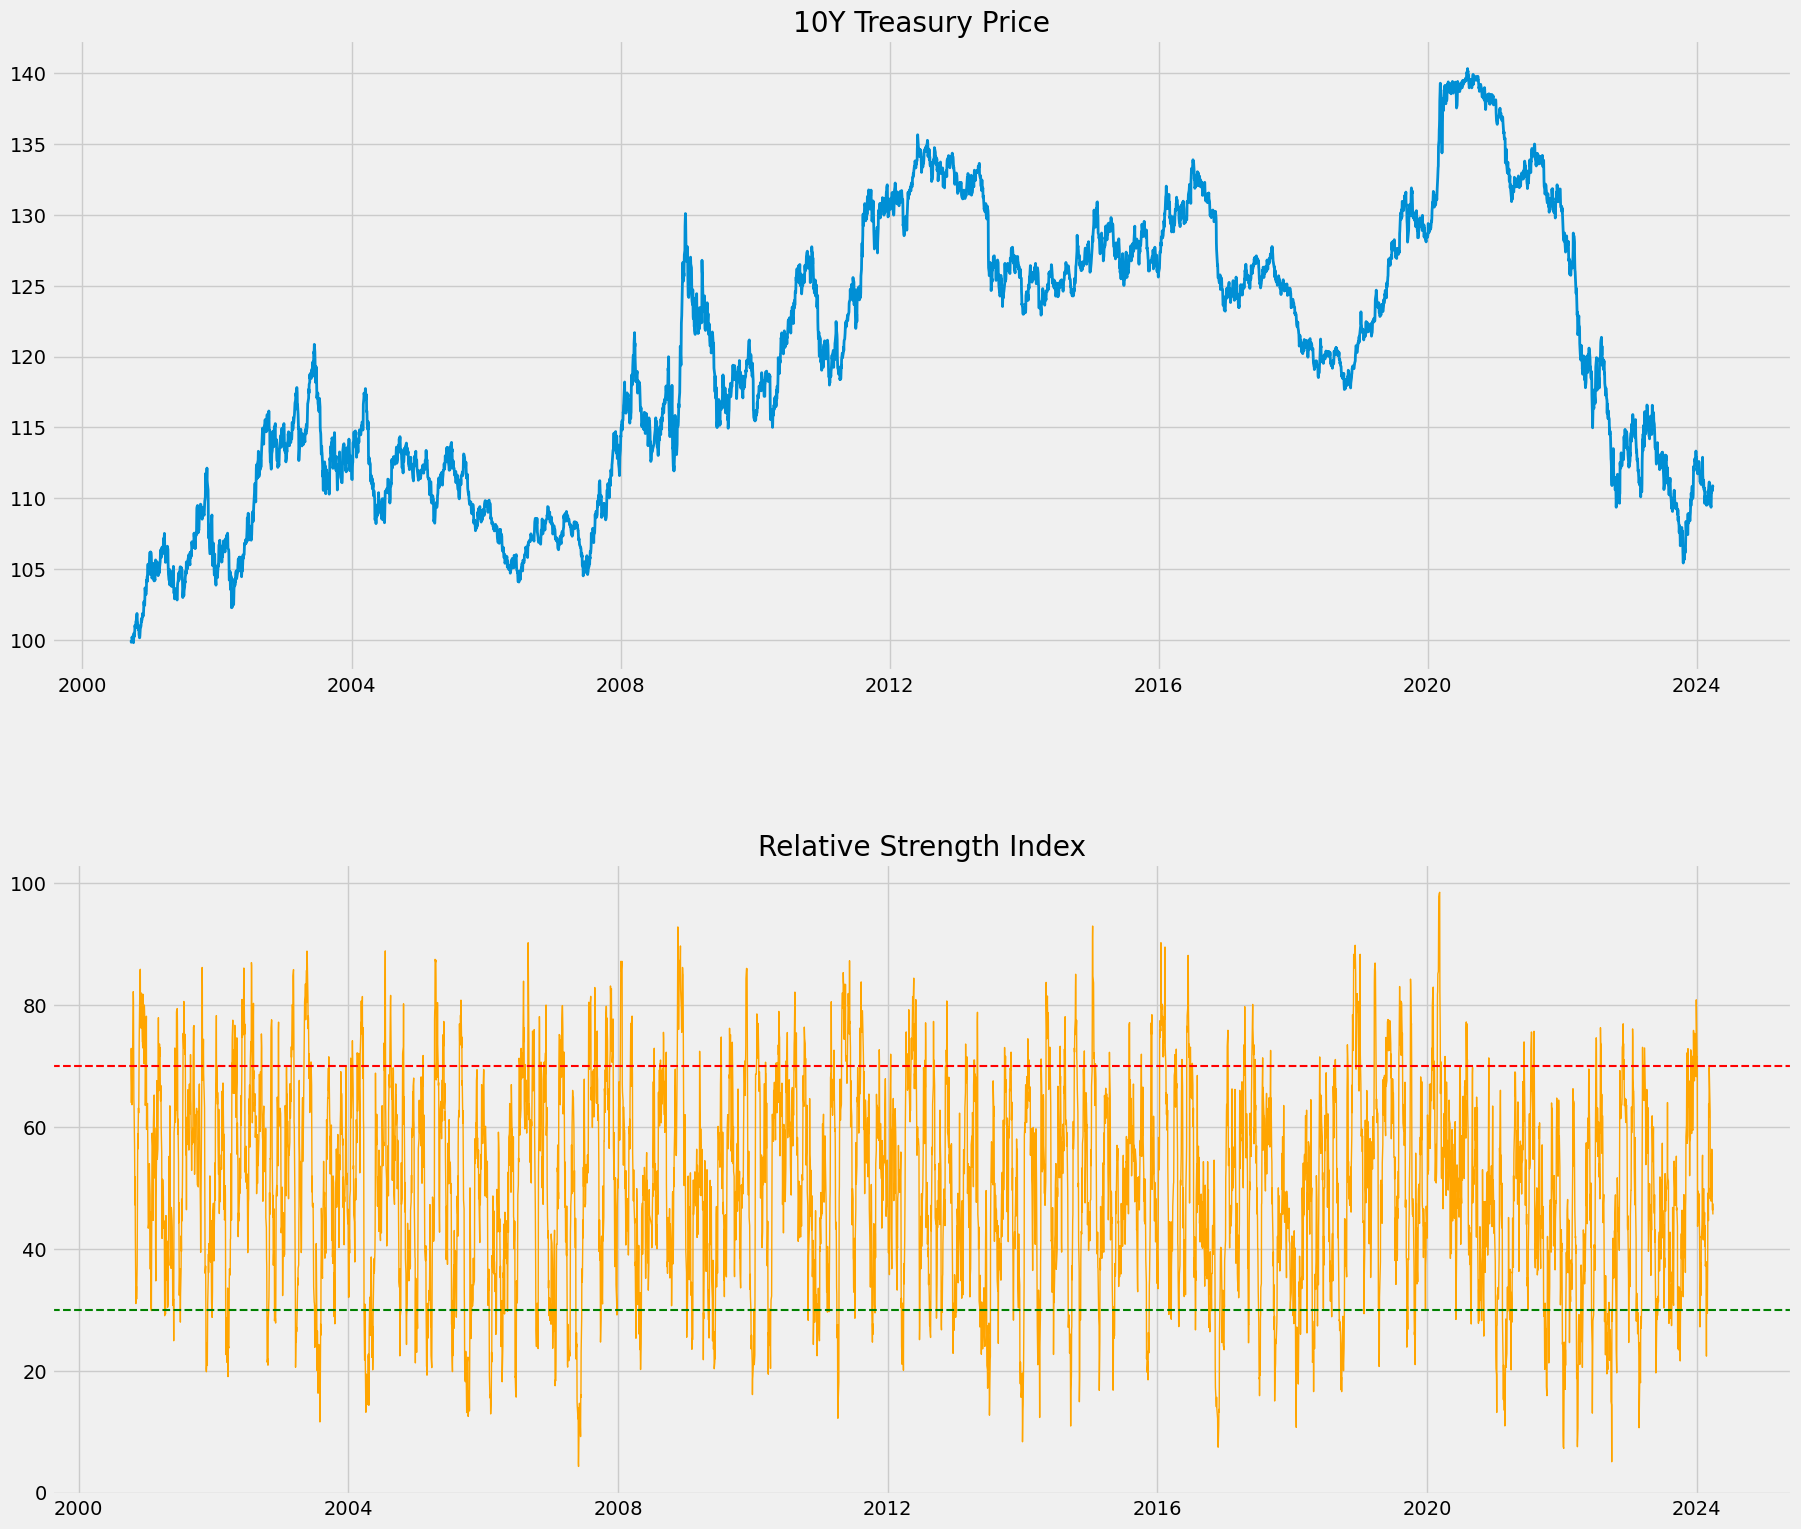

In [43]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)


ax1.plot(data['Close'], linewidth=2)
ax1.set_title('10Y Treasury Price')


ax2.set_title('Relative Strength Index')
ax2.plot(rsi, color='orange', linewidth=1)
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
plt.show()

In [44]:
buy_signal = [None] * len(data)
sell_signal = [None] * len(data)

In [45]:
for i in range(len(rsi)):
    if rsi[i] < 30:
        buy_signal[i] = data['Close'][i]
    elif rsi[i] > 70:
        sell_signal[i] = data['Close'][i]

In [50]:
data2=data.copy()
data2['log_returns'] = np.log(data2['Adj Close'] / data2['Adj Close'].shift(1))
#dates_buy = data2.index[buy_signal]
#dates_sell = data2.index[sell_signal]
dates_buy = [data2.index[i] for i, x in enumerate(buy_signal) if x is not None]
dates_sell = [data2.index[i] for i, x in enumerate(sell_signal) if x is not None]
data2['position'] = np.nan
data2.loc[data2.index.isin(dates_buy), 'position'] = 1
data2.loc[data2.index.isin(dates_sell), 'position'] = -1

In [51]:
data2['strategy_returns'] = data2['log_returns'] * data2['position'].shift(1)


                    Strategy
------------------  ----------
Start Period        2000-10-12
End Period          2024-02-27
Risk-Free Rate      3.5%
Time in Market      98.0%

Cumulative Return   -90.23%
CAGR﹪              -6.63%

Sharpe              -7.2
Prob. Sharpe Ratio  0.0%
Sortino             -7.04
Sortino/√2          -4.98
Omega               0.26

Max Drawdown        -90.19%
Longest DD Days     8534

Gain/Pain Ratio     -0.71
Gain/Pain (1M)      -0.97

Payoff Ratio        0.59
Profit Factor       0.29
Common Sense Ratio  0.12
CPC Index           0.06
Tail Ratio          0.42
Outlier Win Ratio   3.5
Outlier Loss Ratio  3.85

MTD                 -0.47%
3M                  -4.85%
6M                  -8.33%
YTD                 -0.41%
1Y                  -14.94%
3Y (ann.)           -8.7%
5Y (ann.)           -7.9%
10Y (ann.)          -5.88%
All-time (ann.)     -6.63%

Avg. Drawdown       -90.19%
Avg. Drawdown Days  8534
Recovery Factor     2.56
Ulcer Index         0.66
Serenity Index 

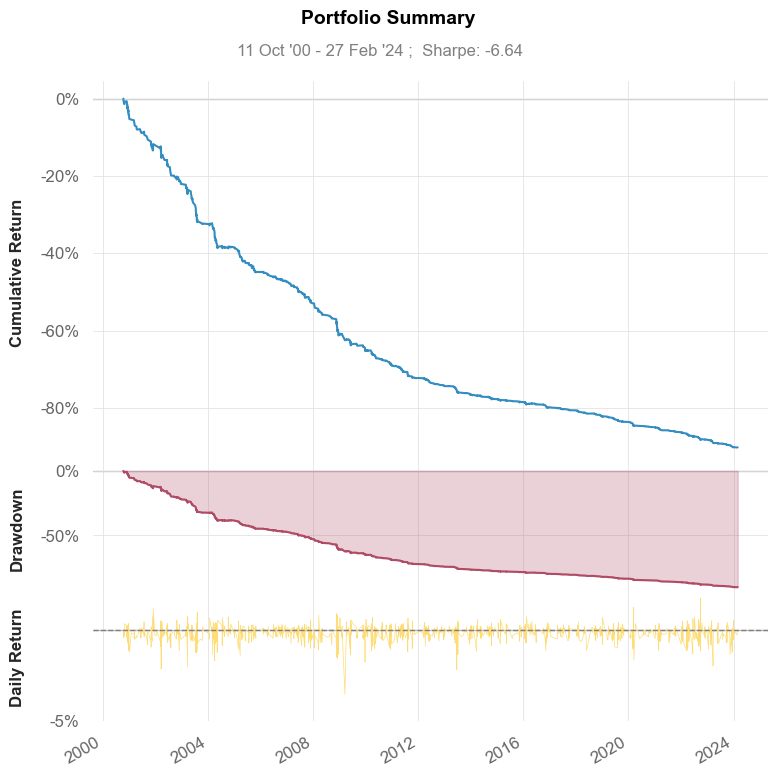

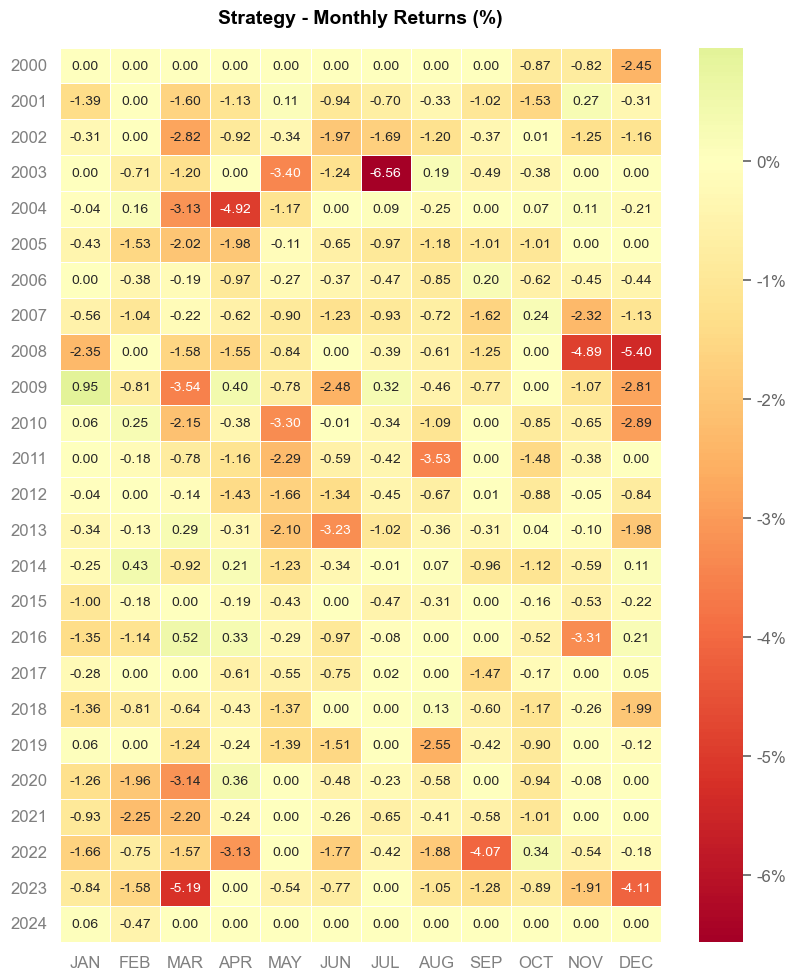

In [53]:
import quantstats as qs

qs.reports.basic(data2['strategy_returns'], rf=0.035)